In [2]:
import numpy as np
import scipy.io
import numpy as np
import seaborn as sns
import pandas as pd
import random

## Trial...

In [3]:
mat_file_name = "./data_preprocessed_matlab/s01.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [4]:
type(mat_file)

dict

In [5]:
for i in mat_file:
    print(i)

__header__
__version__
__globals__
labels
data


In [6]:
mat_file['labels'].shape

(40, 4)

In [7]:
mat_file['labels'][:10] # (40, 2)로 바꾸기 : valence, arousal

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09]])

In [8]:
mat_file['labels']

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3.

In [9]:
mat_file['data'].shape # (40, 32, 7680) : 앞쪽 3초 제거 (3sec * 128Hz)

(40, 40, 8064)

In [10]:
# (40, 2)로 바꾸기
import numpy as np
label_np = np.array(mat_file['labels'])
label_np_resized = label_np[:, :2]
label_np_resized.shape

(40, 2)

In [11]:
# (40, 32, 7680)로 바꾸기
data_np = np.array(mat_file['data'])
data_np_resized = data_np[:, :32, 384:]
data_np_resized.shape

(40, 32, 7680)

## label, data 읽고 resize

In [12]:
for i in range(1, 33):
    if i<10:
        mat_file_name = f"./data_preprocessed_matlab/s0{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        # label resize
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]
        
        # data resize
        data_np = np.array(mat_file['data'])
        globals()[f"data_{i}_np"] = data_np[:, :32, 384:]
    else:
        mat_file_name = f"./data_preprocessed_matlab/s{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]
        
        # data resize
        data_np = np.array(mat_file['data'])
        globals()[f"data_{i}_np"] = data_np[:, :32, 384:]

In [13]:
label_1_np, data_1_np

(array([[7.71, 7.6 ],
        [8.1 , 7.31],
        [8.58, 7.54],
        [4.94, 6.01],
        [6.96, 3.92],
        [8.27, 3.92],
        [7.44, 3.73],
        [7.32, 2.55],
        [4.04, 3.29],
        [1.99, 4.86],
        [2.99, 2.36],
        [2.71, 2.77],
        [1.95, 3.12],
        [4.18, 2.24],
        [3.17, 8.08],
        [6.81, 7.44],
        [2.46, 6.91],
        [7.23, 7.15],
        [7.17, 8.  ],
        [8.26, 7.91],
        [9.  , 7.95],
        [7.09, 2.08],
        [8.15, 3.01],
        [7.04, 7.09],
        [8.86, 7.21],
        [7.28, 7.27],
        [7.35, 6.95],
        [3.88, 3.35],
        [1.36, 2.27],
        [2.08, 2.99],
        [3.03, 8.14],
        [2.28, 8.  ],
        [3.81, 3.85],
        [2.28, 7.09],
        [2.06, 8.15],
        [2.9 , 6.92],
        [2.31, 6.88],
        [3.33, 7.18],
        [3.24, 6.18],
        [5.1 , 7.12]]),
 array([[[ 4.05213000e+00,  2.89121020e+00, -1.77958774e+00, ...,
          -2.82648937e+00, -4.47722969e+00, -3.67692

## 시각화

In [14]:
import matplotlib.pyplot as plt

### labels

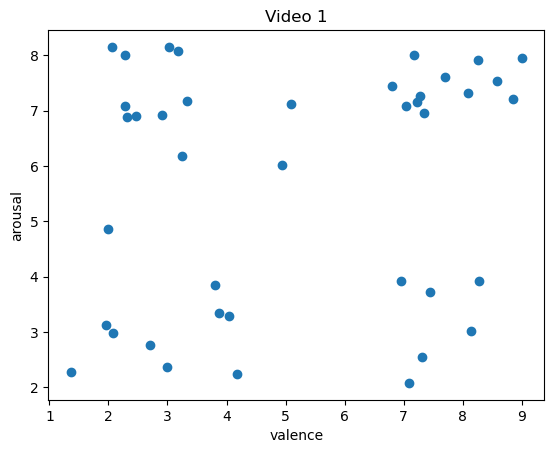

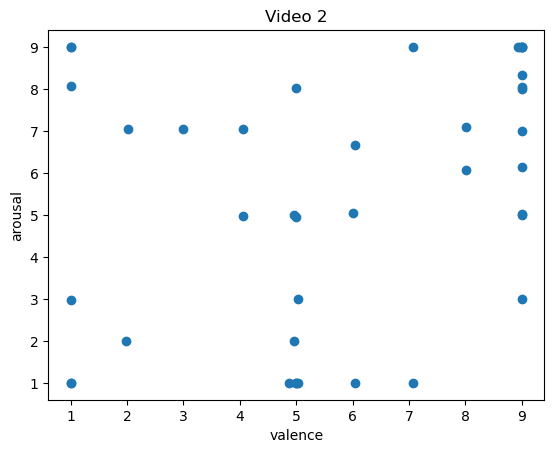

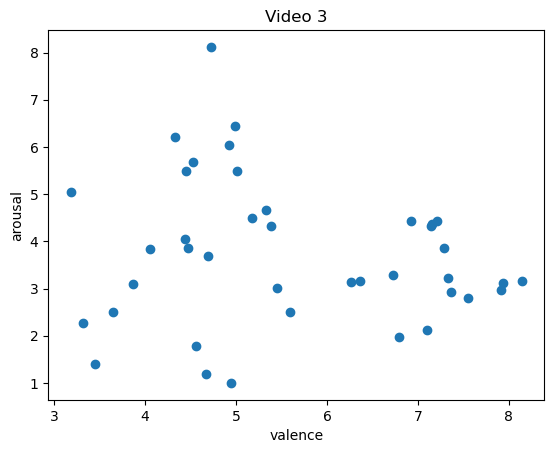

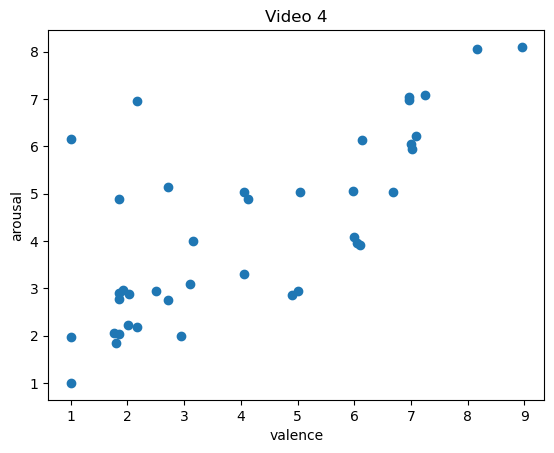

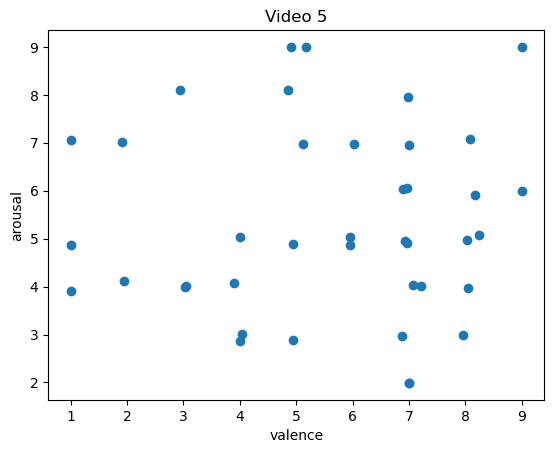

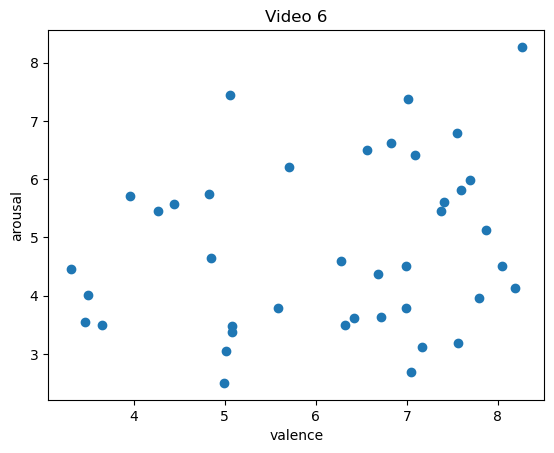

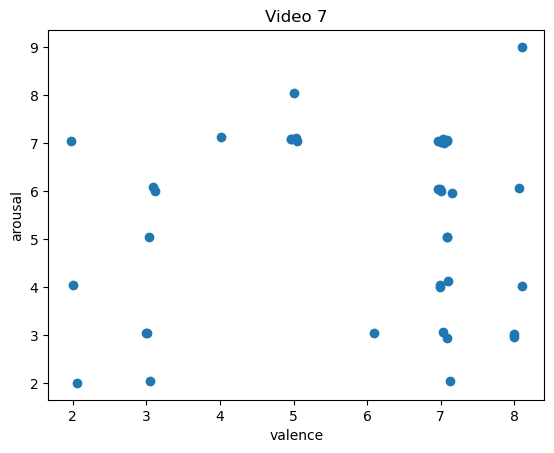

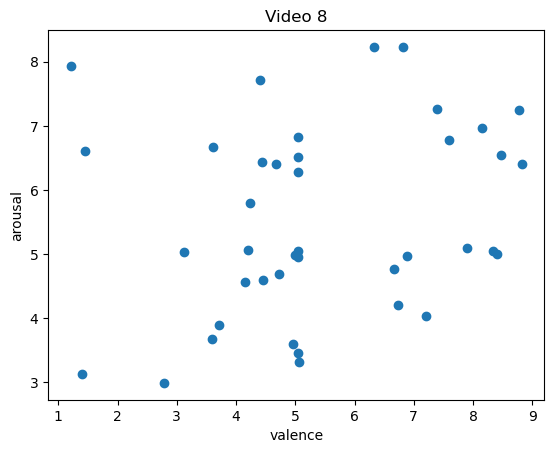

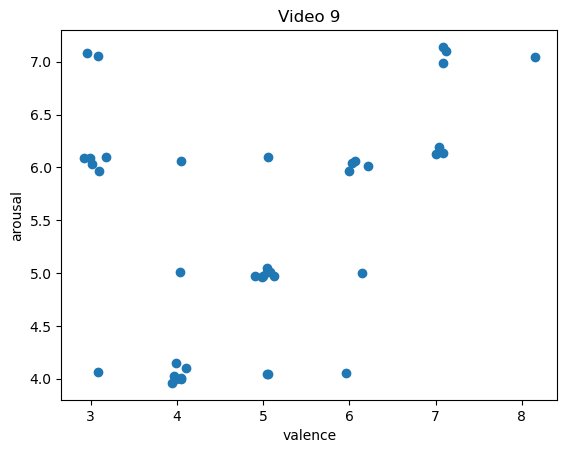

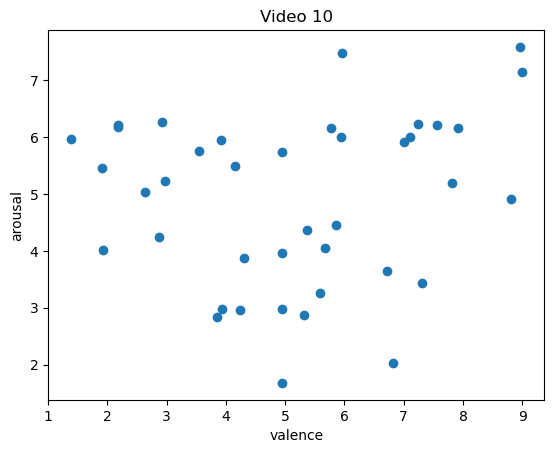

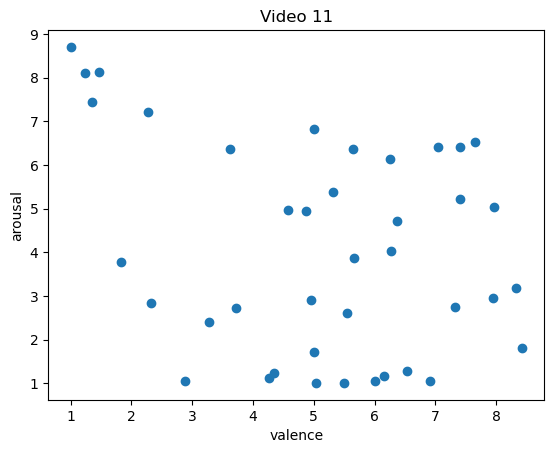

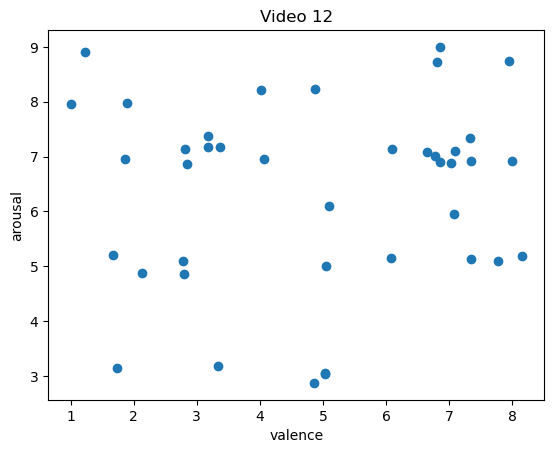

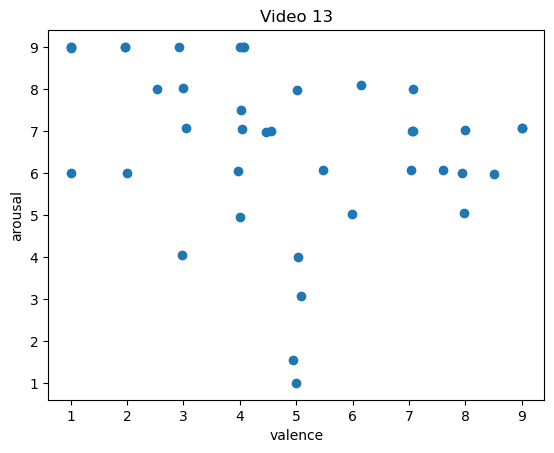

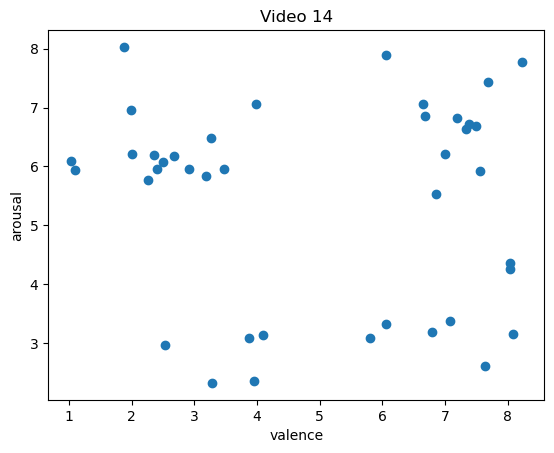

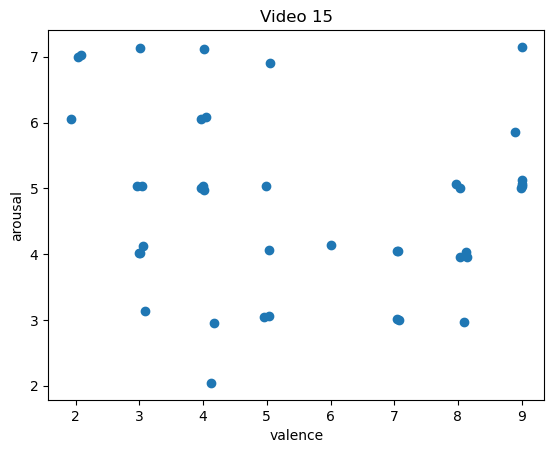

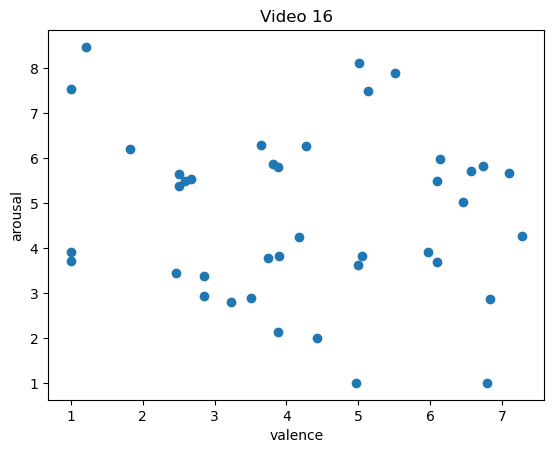

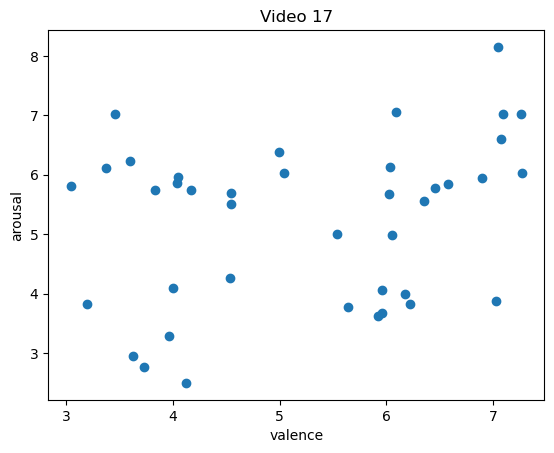

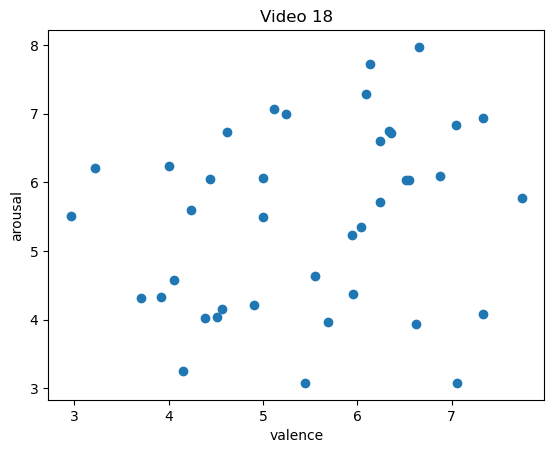

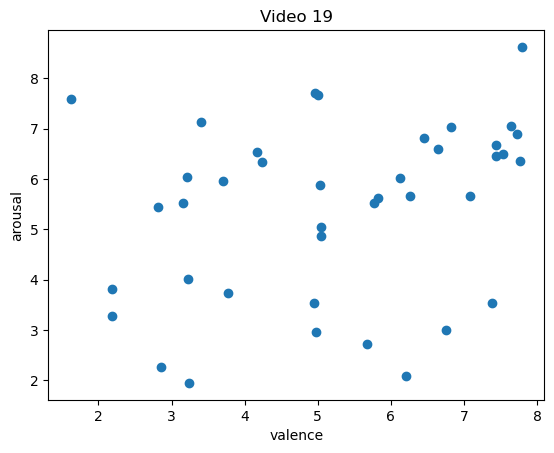

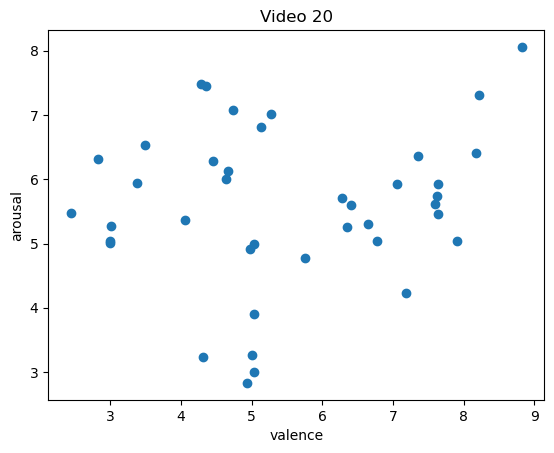

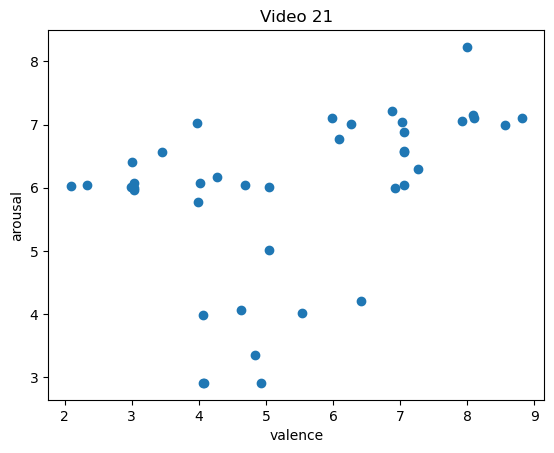

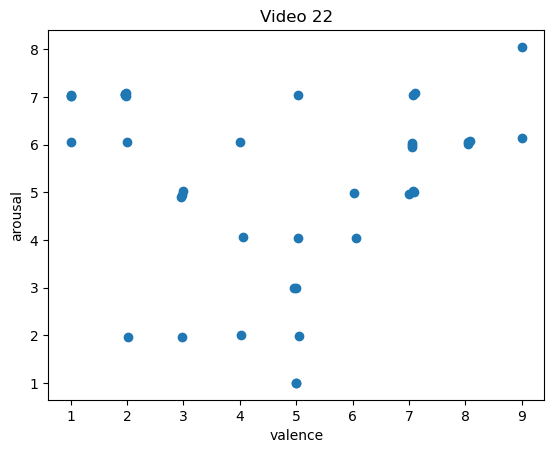

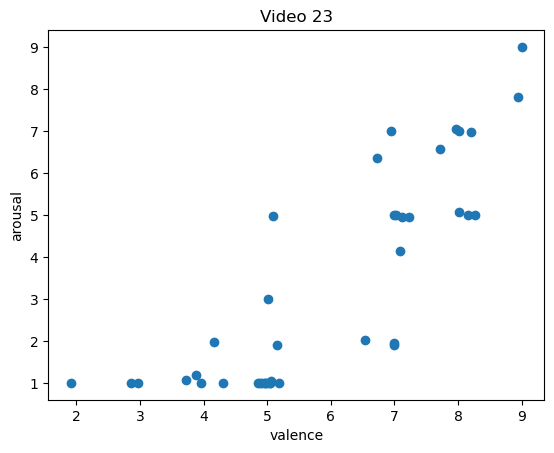

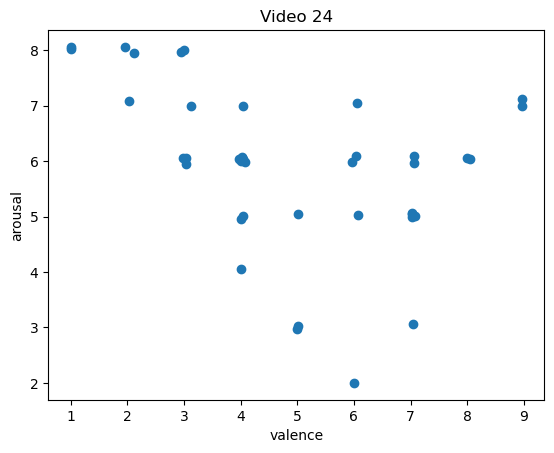

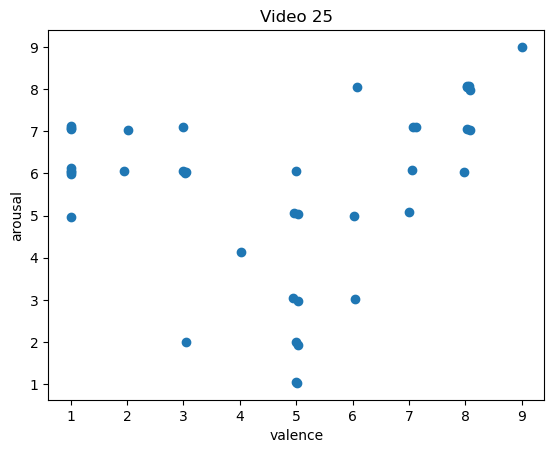

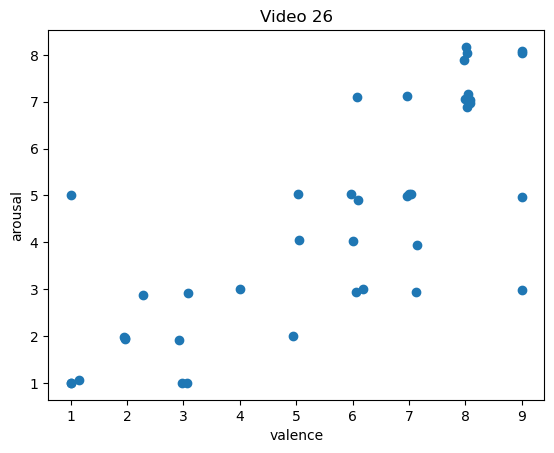

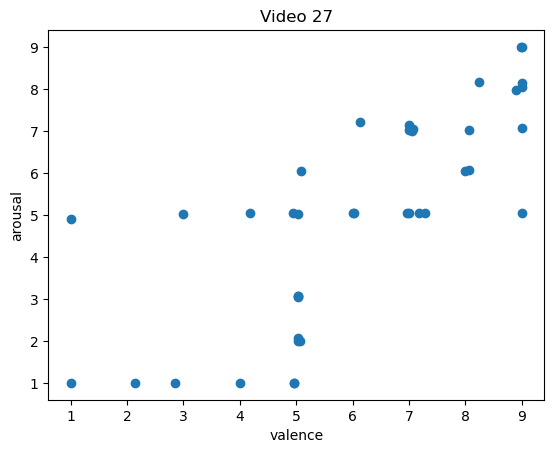

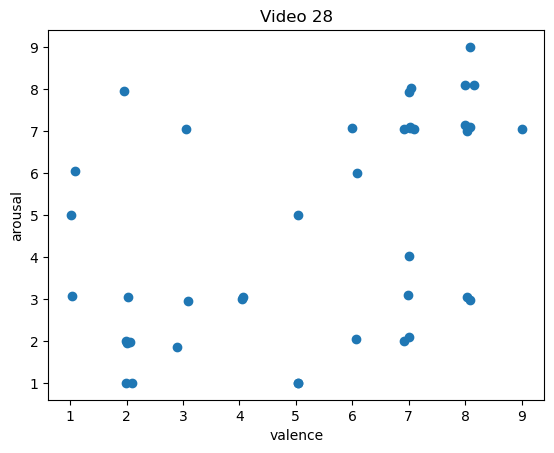

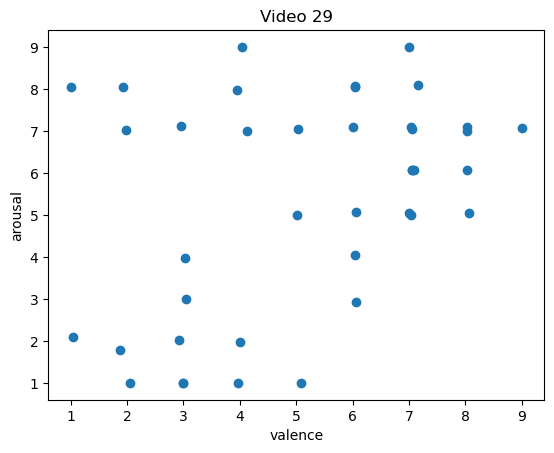

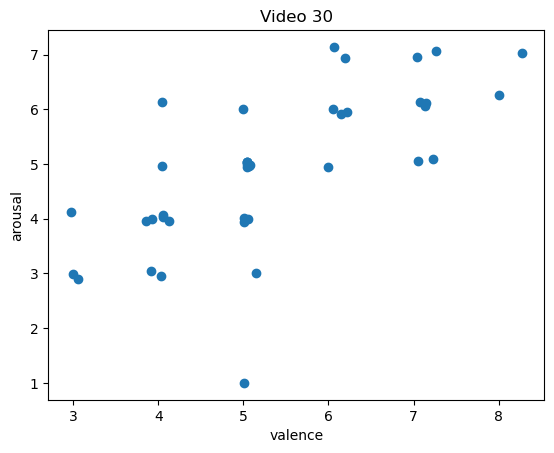

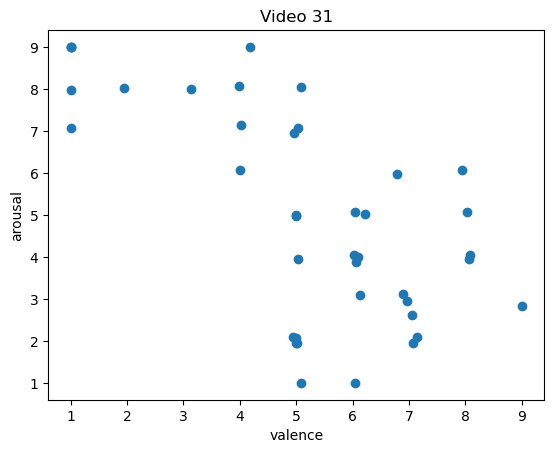

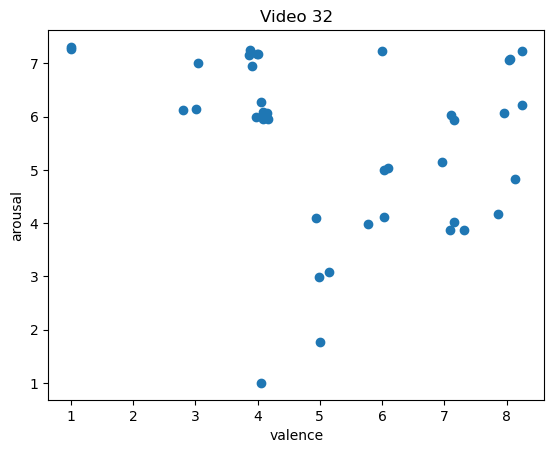

In [15]:
for i in range(1, 33):    
    plt.scatter(eval(f"label_{i}_np[:,0]"), eval(f"label_{i}_np[:,1]"))
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.title(f"Video {i}")
    plt.show()

## train_test_split

### subject 별

#### binarize

In [108]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=4.5, copy=False)

for i in range(1, 33):
    globals()[f"label_{i}_np_bin"] = binarizer.transform(eval(f"label_{i}_np"))

label_1_np_bin

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.]])

In [109]:
label_1_np_bin.shape

(40, 2)

#### categoize
label_concat DateFrame을 만들고 column으로 va_00, va_01, va_10, va_11을 지정한다. 총 32개의 video에 대해서 각 카테고리에 해당하는 분포가 어떻게 되는지 저장한다.

In [110]:
va_00 = []
for i in range(1, 33):
    va_00.append(np.sum([(eval(f"label_{i}_np_bin[{j}]") == [0, 0]).all() for j in range(40)]))
len(va_00)

32

In [111]:
va_01 = []
for i in range(1, 33):
    va_01.append(np.sum([(eval(f"label_{i}_np_bin[{j}]") == [0, 1]).all() for j in range(40)]))
len(va_01)

32

In [115]:
va_10 = []
for i in range(1, 33):
    va_10.append(np.sum([(eval(f"label_{i}_np_bin[{j}]") == [1, 0]).all() for j in range(40)]))
len(va_10)

32

In [116]:
va_11 = []
for i in range(1, 33):
    va_11.append(np.sum([(eval(f"label_{i}_np_bin[{j}]") == [1, 1]).all() for j in range(40)]))
len(va_11)

32

In [118]:
label_concat_subject = pd.DataFrame({
    "va_00" : va_00,
    "va_01" : va_01,
    "va_10" : va_10,
    "va_11" : va_11
})
label_concat_subject

,va_00,va_01,va_10,va_11
0,9,11,6,14
1,4,7,9,20
2,7,3,24,6
3,17,6,5,12
4,7,5,8,20
5,4,3,17,16
6,5,5,10,20
7,4,10,5,21
8,8,9,3,20
9,6,10,11,13


#### 순서대로 나누기

In [119]:
# test_size = 0.2
train_data = label_concat_subject[:26]
test_data = label_concat_subject[26:]
train_data

,va_00,va_01,va_10,va_11
0,9,11,6,14
1,4,7,9,20
2,7,3,24,6
3,17,6,5,12
4,7,5,8,20
5,4,3,17,16
6,5,5,10,20
7,4,10,5,21
8,8,9,3,20
9,6,10,11,13


#### 랜덤하게 나누기

In [120]:
idx = np.arange(32)
train_idx = np.random.choice(32, size=26, replace=False)
test_idx = np.delete(arr=idx, obj=train_idx)

In [121]:
train_data = label_concat_subject.iloc[train_idx]
test_data = label_concat_subject.iloc[test_idx]

In [122]:
train_data

,va_00,va_01,va_10,va_11
18,6,8,6,20
13,5,15,8,12
4,7,5,8,20
5,4,3,17,16
31,1,17,10,12
12,1,19,4,16
21,4,14,7,15
28,10,7,3,20
3,17,6,5,12
15,12,11,8,9


In [123]:
test_data

,va_00,va_01,va_10,va_11
6,5,5,10,20
16,6,8,8,18
19,1,11,5,23
22,8,0,16,16
24,2,14,7,17
25,12,1,8,19


### movie 별

In [124]:
for i in range(1, 33):
    if i<10:
        mat_file_name = f"./data_preprocessed_matlab/s0{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        # label resize
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]
        
    else:
        mat_file_name = f"./data_preprocessed_matlab/s{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]

In [125]:
label_concat_movie = [ eval(f"label_{i}_np") for i in range(1, 33) ]
label_concat_movie

[array([[7.71, 7.6 ],
        [8.1 , 7.31],
        [8.58, 7.54],
        [4.94, 6.01],
        [6.96, 3.92],
        [8.27, 3.92],
        [7.44, 3.73],
        [7.32, 2.55],
        [4.04, 3.29],
        [1.99, 4.86],
        [2.99, 2.36],
        [2.71, 2.77],
        [1.95, 3.12],
        [4.18, 2.24],
        [3.17, 8.08],
        [6.81, 7.44],
        [2.46, 6.91],
        [7.23, 7.15],
        [7.17, 8.  ],
        [8.26, 7.91],
        [9.  , 7.95],
        [7.09, 2.08],
        [8.15, 3.01],
        [7.04, 7.09],
        [8.86, 7.21],
        [7.28, 7.27],
        [7.35, 6.95],
        [3.88, 3.35],
        [1.36, 2.27],
        [2.08, 2.99],
        [3.03, 8.14],
        [2.28, 8.  ],
        [3.81, 3.85],
        [2.28, 7.09],
        [2.06, 8.15],
        [2.9 , 6.92],
        [2.31, 6.88],
        [3.33, 7.18],
        [3.24, 6.18],
        [5.1 , 7.12]]),
 array([[9.  , 5.03],
        [8.01, 7.1 ],
        [9.  , 9.  ],
        [6.05, 1.  ],
        [5.04, 3.  ],
        

In [77]:
label_concat_movie_df = pd.DataFrame(columns=range(40))
for j in range(32):
    data=label_concat_movie[j]
    for i, pair in enumerate(data):
        label_concat_movie_df.loc[j, i] = pair
label_concat_movie_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,"[7.71, 7.6]","[8.1, 7.31]","[8.58, 7.54]","[4.94, 6.01]","[6.96, 3.92]","[8.27, 3.92]","[7.44, 3.73]","[7.32, 2.55]","[4.04, 3.29]","[1.99, 4.86]",...,"[3.03, 8.14]","[2.28, 8.0]","[3.81, 3.85]","[2.28, 7.09]","[2.06, 8.15]","[2.9, 6.92]","[2.31, 6.88]","[3.33, 7.18]","[3.24, 6.18]","[5.1, 7.12]"
1,"[9.0, 5.03]","[8.01, 7.1]","[9.0, 9.0]","[6.05, 1.0]","[5.04, 3.0]","[5.0, 4.94]","[4.96, 1.99]","[9.0, 9.0]","[9.0, 7.0]","[4.99, 1.0]",...,"[4.06, 7.05]","[1.0, 9.0]","[5.0, 8.03]","[4.87, 1.0]","[1.99, 2.0]","[5.04, 1.0]","[1.0, 8.06]","[1.0, 9.0]","[1.0, 1.0]","[6.05, 6.67]"
2,"[5.33, 4.67]","[7.21, 4.44]","[7.55, 2.81]","[4.69, 3.69]","[6.92, 4.44]","[6.79, 1.97]","[5.45, 3.01]","[7.14, 4.33]","[7.33, 3.23]","[4.45, 5.49]",...,"[4.44, 4.06]","[5.17, 4.49]","[4.05, 3.83]","[4.72, 8.12]","[3.18, 5.04]","[5.01, 5.5]","[4.92, 6.05]","[4.53, 5.68]","[4.33, 6.21]","[5.38, 4.33]"
3,"[6.68, 5.03]","[4.06, 3.31]","[8.95, 8.1]","[6.1, 3.92]","[4.06, 5.04]","[5.01, 2.95]","[2.94, 1.99]","[5.97, 5.05]","[6.05, 3.96]","[3.15, 3.99]",...,"[2.01, 2.23]","[1.01, 6.15]","[1.0, 1.97]","[2.17, 2.18]","[2.03, 2.88]","[2.72, 2.76]","[1.0, 1.0]","[1.79, 1.85]","[1.92, 2.96]","[1.86, 2.91]"
4,"[6.97, 4.9]","[9.0, 9.0]","[4.95, 4.88]","[8.24, 5.08]","[3.04, 4.01]","[8.09, 7.08]","[5.12, 6.97]","[8.17, 5.91]","[6.94, 4.95]","[3.03, 4.0]",...,"[6.9, 6.04]","[1.94, 4.12]","[5.17, 9.0]","[6.03, 6.97]","[4.86, 8.1]","[4.91, 9.0]","[1.91, 7.01]","[1.0, 3.91]","[1.0, 4.86]","[7.0, 6.96]"
5,"[8.19, 4.13]","[6.83, 6.62]","[7.69, 5.99]","[7.55, 6.79]","[7.01, 7.38]","[8.05, 4.5]","[8.26, 8.27]","[7.05, 2.69]","[7.87, 5.13]","[7.37, 5.46]",...,"[3.65, 3.49]","[6.99, 4.5]","[6.68, 4.37]","[3.31, 4.45]","[3.96, 5.71]","[5.71, 6.21]","[4.83, 5.74]","[4.44, 5.58]","[6.56, 6.5]","[4.85, 4.64]"
6,"[8.1, 4.01]","[7.15, 5.96]","[7.1, 4.12]","[7.08, 5.03]","[7.05, 6.99]","[6.97, 6.04]","[7.08, 7.06]","[7.0, 5.99]","[6.99, 4.0]","[7.09, 7.04]",...,"[6.96, 7.03]","[4.96, 7.09]","[4.97, 7.08]","[4.01, 7.13]","[5.01, 8.05]","[8.1, 9.0]","[5.05, 7.04]","[5.03, 7.1]","[7.01, 7.01]","[7.01, 7.03]"
7,"[7.6, 6.78]","[5.04, 6.51]","[8.15, 6.96]","[6.82, 8.23]","[4.41, 7.72]","[7.4, 7.26]","[5.04, 5.04]","[8.82, 6.4]","[8.78, 7.24]","[4.97, 3.6]",...,"[1.45, 6.6]","[6.33, 8.23]","[4.44, 6.44]","[5.05, 6.83]","[3.62, 6.67]","[1.21, 7.94]","[5.06, 3.31]","[4.72, 4.69]","[5.05, 3.46]","[3.13, 5.03]"
8,"[5.05, 4.04]","[7.08, 6.14]","[7.08, 7.14]","[5.99, 5.97]","[4.99, 4.96]","[7.04, 6.19]","[5.08, 5.01]","[6.15, 5.0]","[5.96, 4.05]","[3.94, 3.96]",...,"[6.06, 6.06]","[3.1, 5.97]","[3.08, 4.06]","[5.06, 6.1]","[3.01, 6.03]","[3.08, 7.05]","[2.99, 6.09]","[2.92, 6.09]","[3.17, 6.1]","[5.04, 5.01]"
9,"[7.91, 6.15]","[3.55, 5.76]","[5.86, 4.45]","[7.01, 5.91]","[7.24, 6.23]","[7.1, 6.0]","[8.96, 7.58]","[5.68, 4.05]","[7.56, 6.21]","[5.94, 6.0]",...,"[4.15, 5.49]","[5.96, 7.47]","[4.94, 5.73]","[3.91, 5.95]","[1.38, 5.97]","[2.17, 6.18]","[2.92, 6.26]","[1.91, 5.46]","[2.17, 6.21]","[5.78, 6.15]"


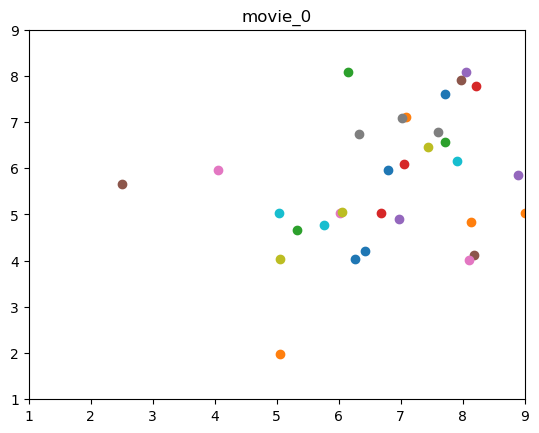

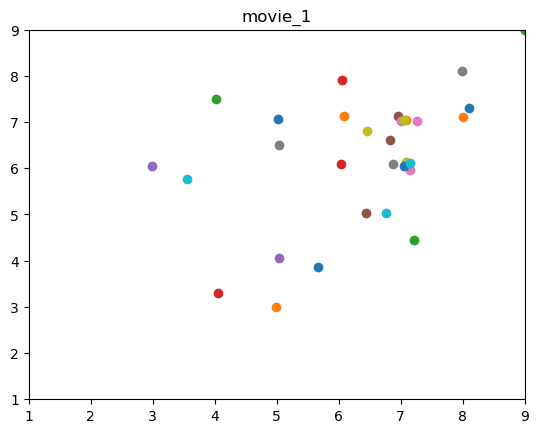

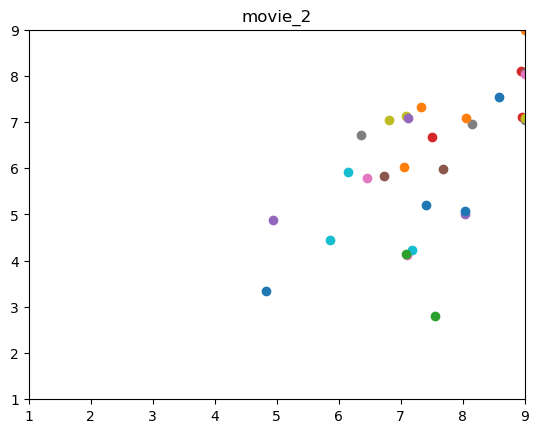

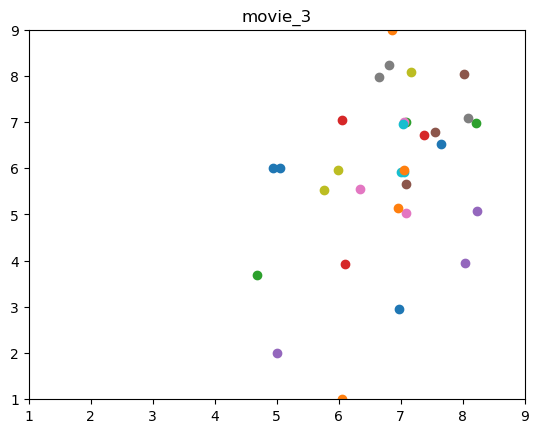

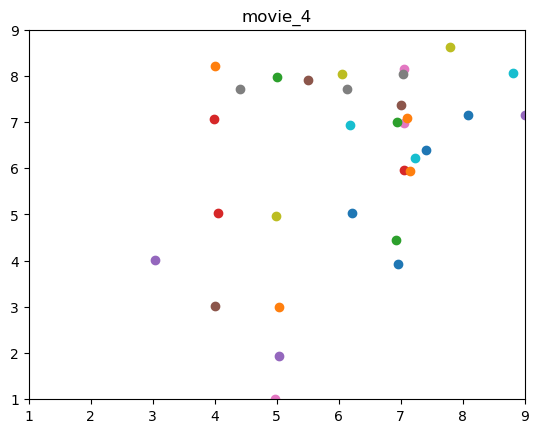

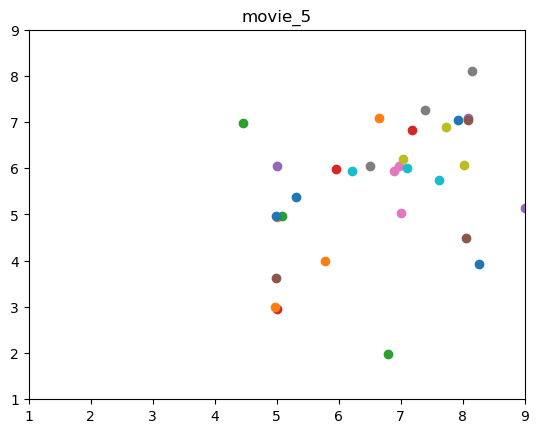

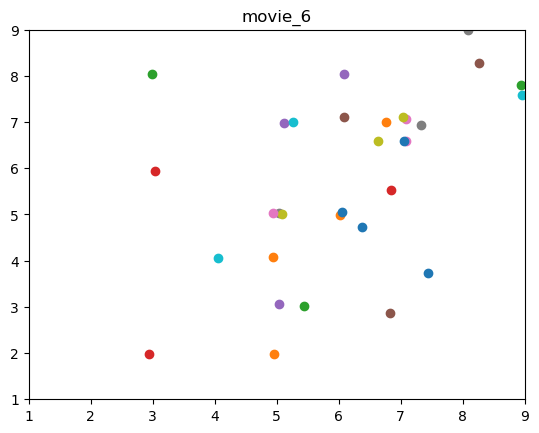

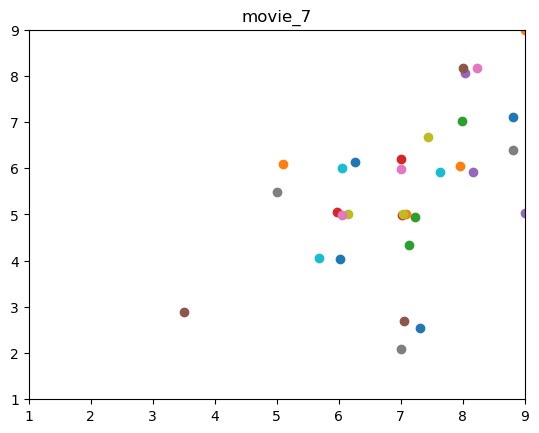

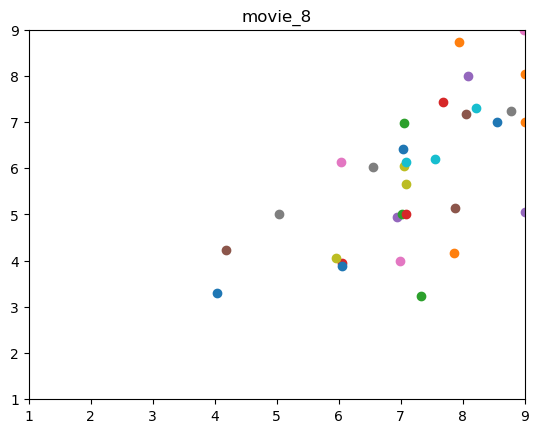

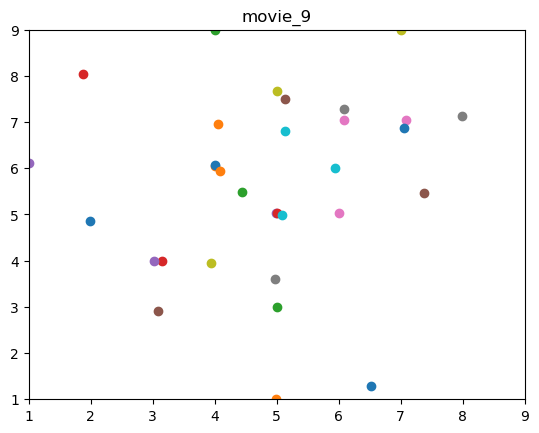

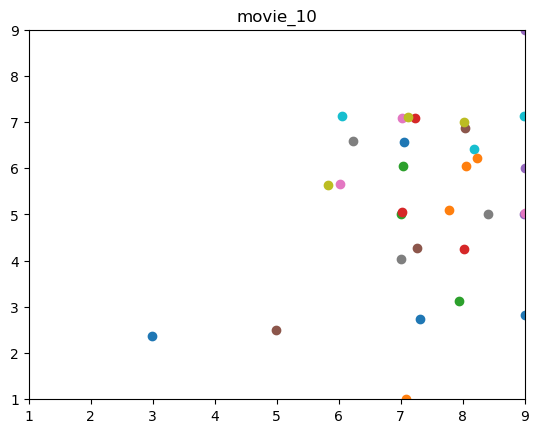

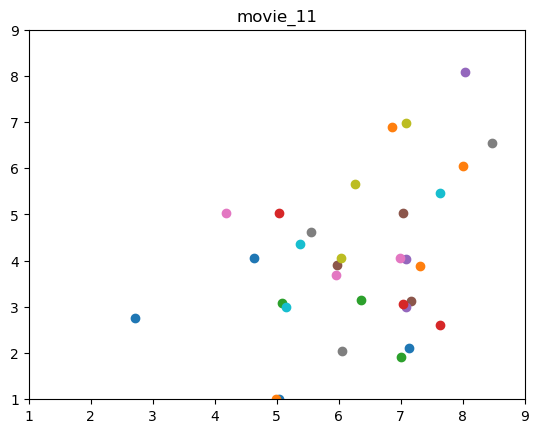

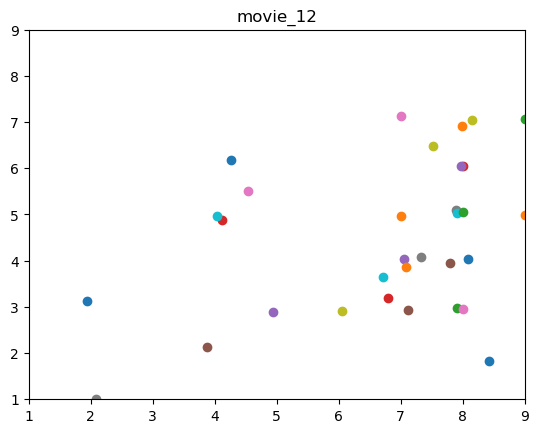

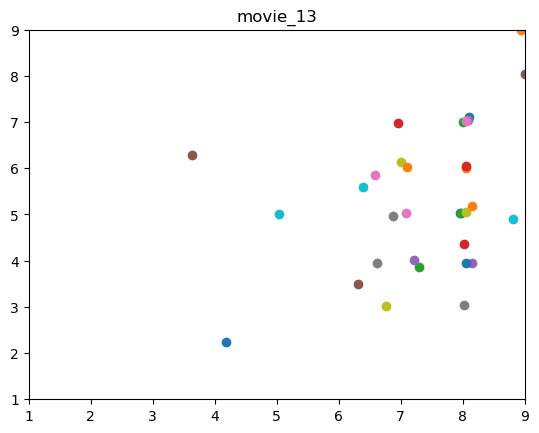

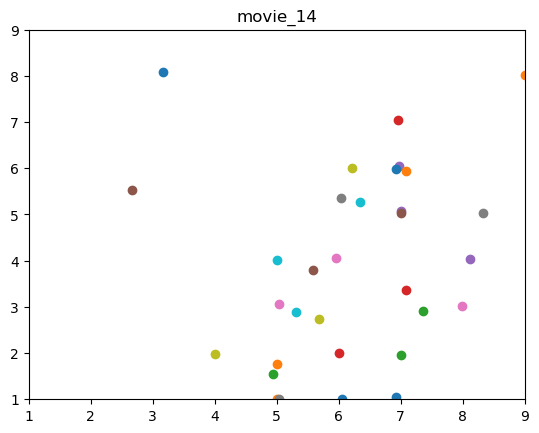

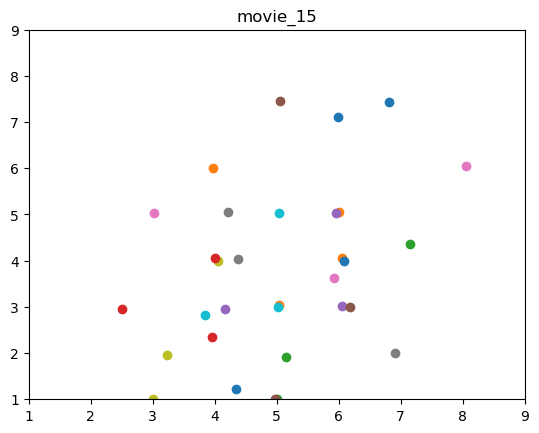

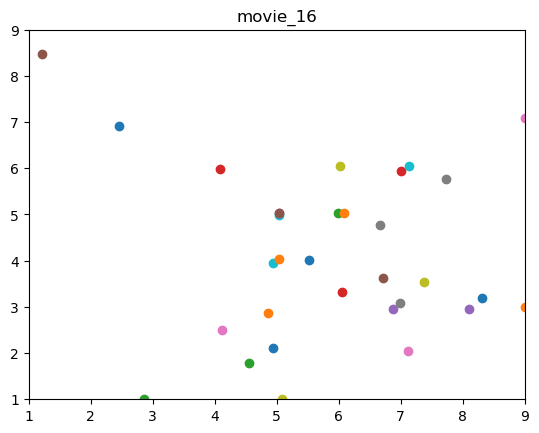

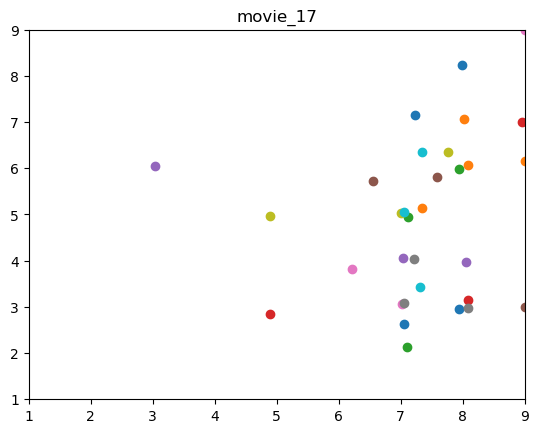

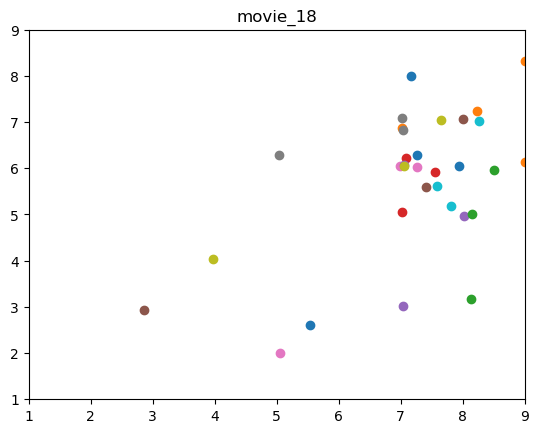

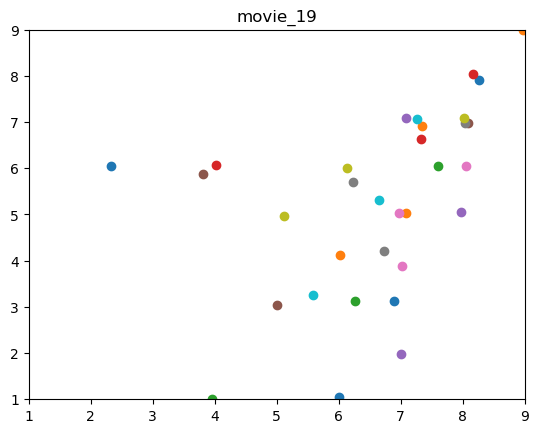

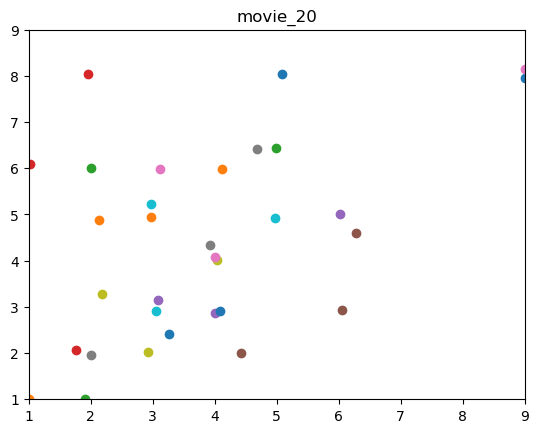

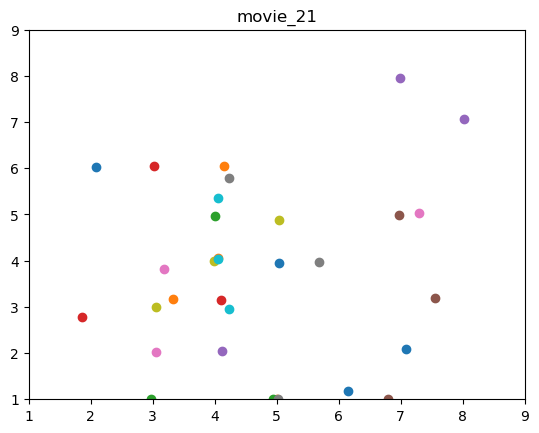

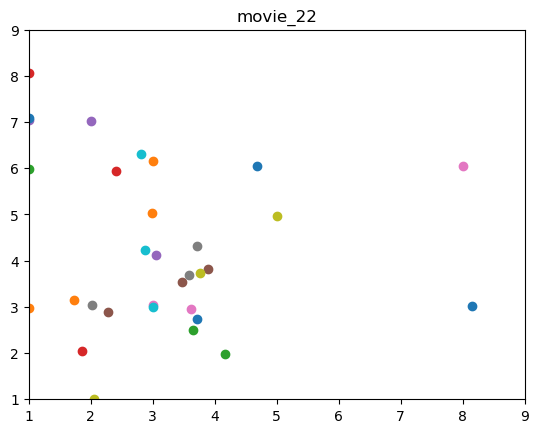

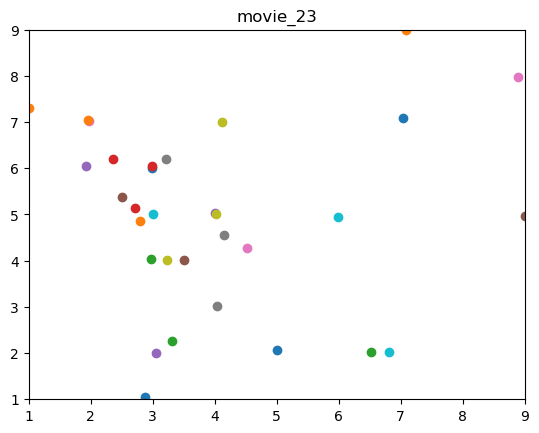

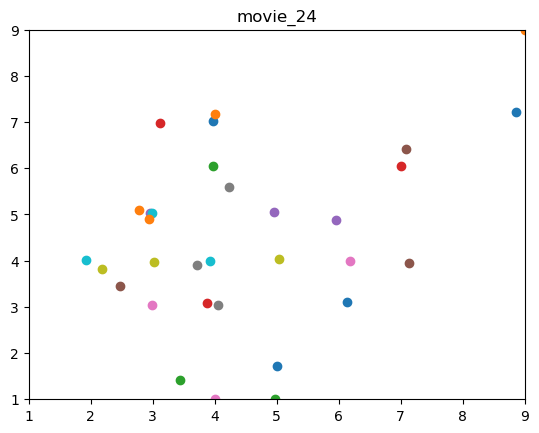

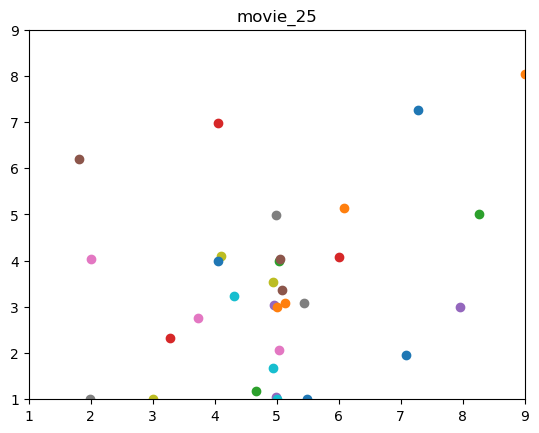

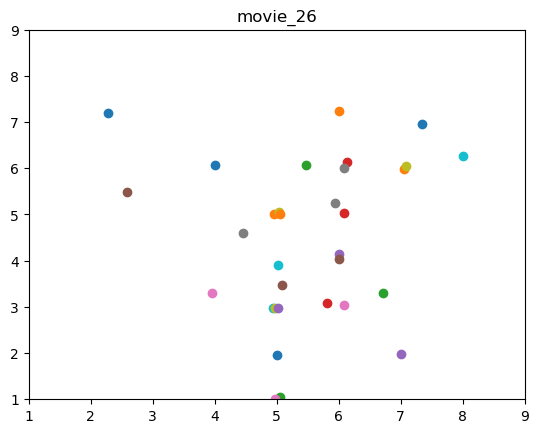

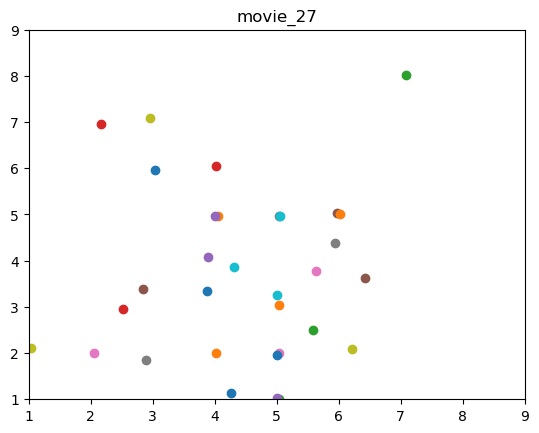

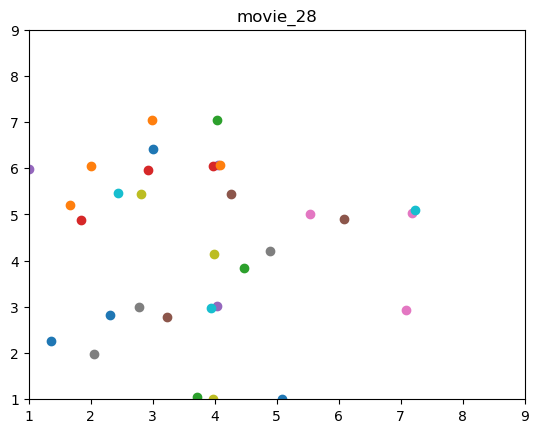

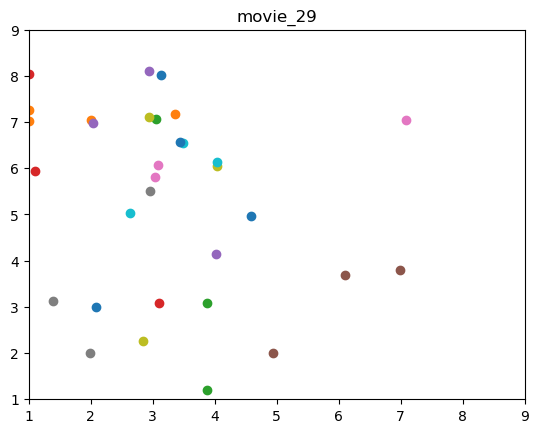

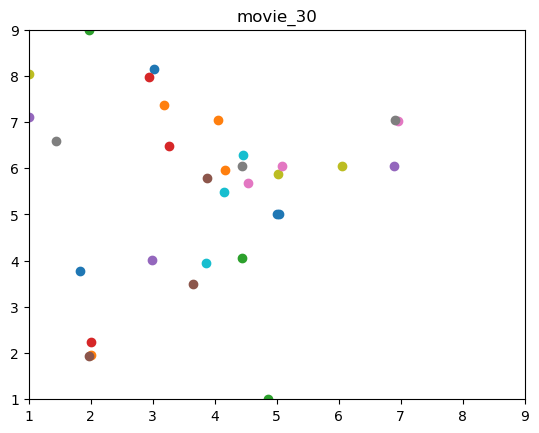

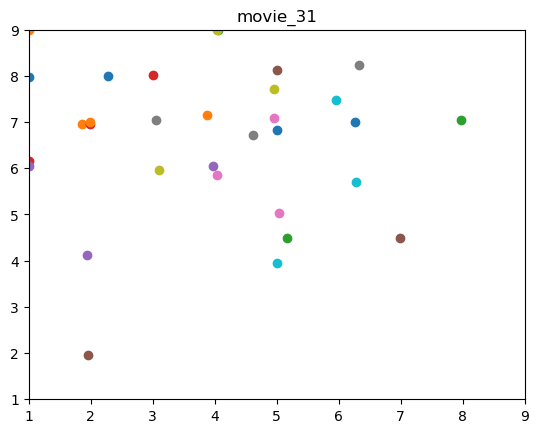

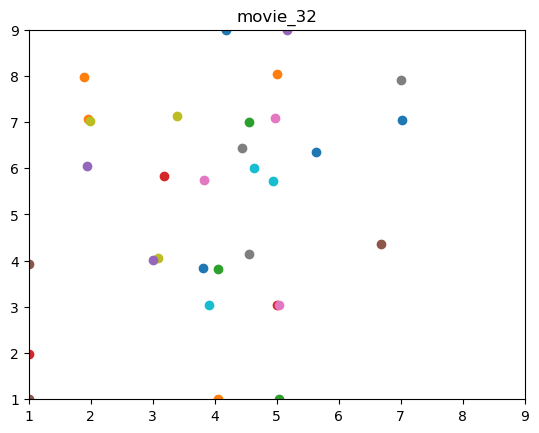

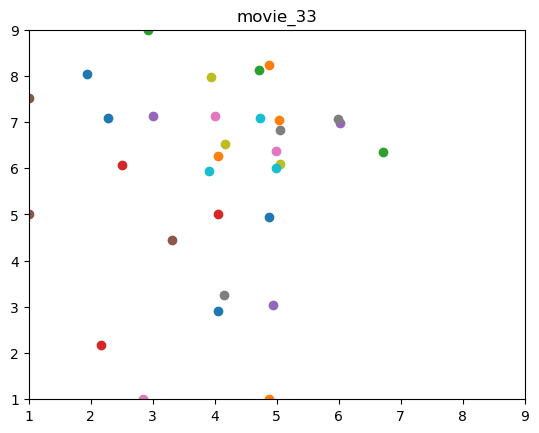

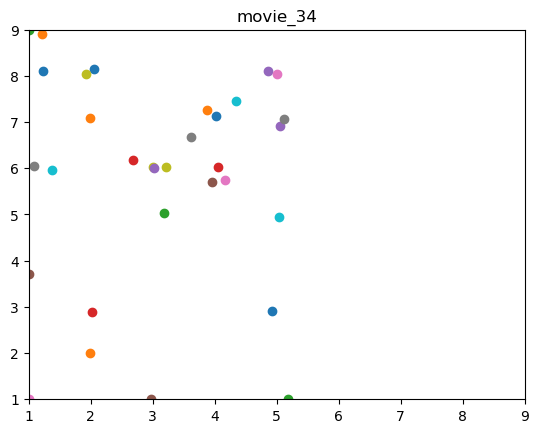

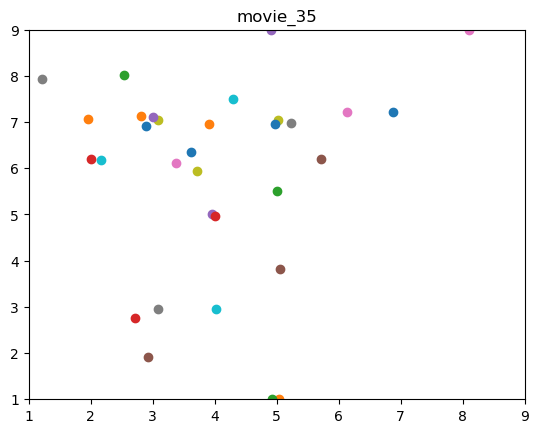

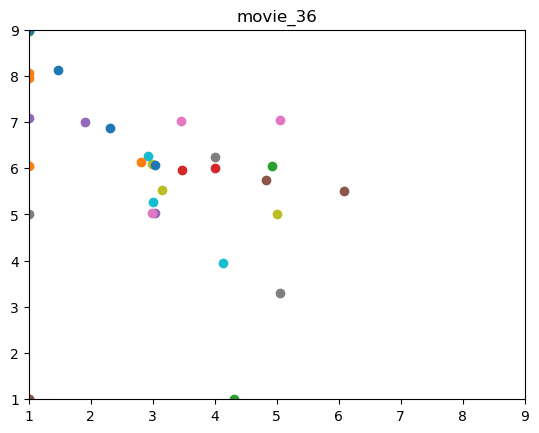

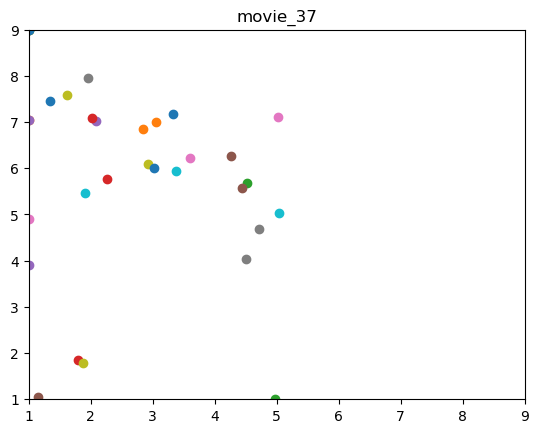

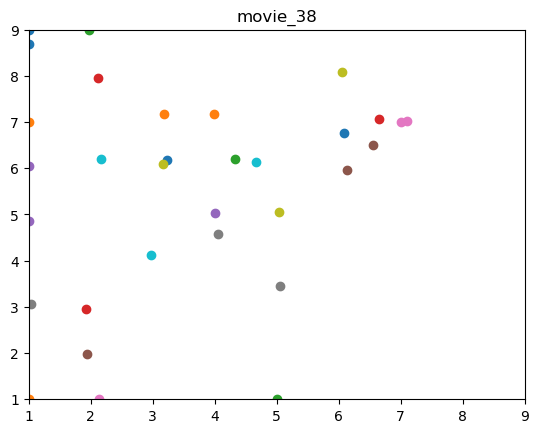

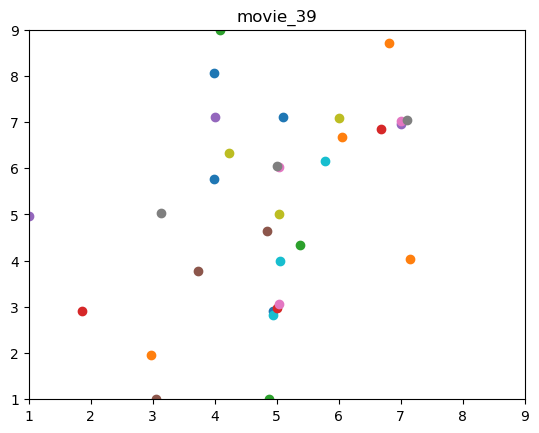

In [101]:
for movie in range(40):
    for i in range(32):
        plt.scatter(label_concat_movie_df[movie][i][0], label_concat_movie_df[movie][i][1])
        plt.xlim((1, 9))
        plt.ylim((1, 9))
        plt.title(f"movie_{movie}")
    plt.show()

#### binarize

In [130]:
label_concat_movie_bin = [ eval(f"label_{i}_np_bin") for i in range(1, 33) ]
label_concat_movie_bin

[array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 1.]]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.],
        [1., 1.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [1., 0.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        

#### concat into DataFrame

In [131]:
label_concat_movie_bin_df = pd.DataFrame(columns=range(40))
for j in range(32):
    data=label_concat_movie_bin[j]
    for i, pair in enumerate(data):
        label_concat_movie_bin_df.loc[j, i] = pair
label_concat_movie_bin_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0]","[0.0, 1.0]",...,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]"
1,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]",...,"[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[0.0, 0.0]","[1.0, 0.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0]","[1.0, 1.0]"
2,"[1.0, 1.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 1.0]",...,"[0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 0.0]"
3,"[1.0, 1.0]","[0.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[0.0, 1.0]","[1.0, 0.0]","[0.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[0.0, 0.0]",...,"[0.0, 0.0]","[0.0, 1.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]"
4,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 0.0]",...,"[1.0, 1.0]","[0.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[0.0, 0.0]","[0.0, 1.0]","[1.0, 1.0]"
5,"[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]",...,"[0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[0.0, 0.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]"
6,"[1.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]",...,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]"
7,"[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]",...,"[0.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 0.0]","[0.0, 1.0]"
8,"[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[0.0, 0.0]",...,"[1.0, 1.0]","[0.0, 1.0]","[0.0, 0.0]","[1.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]"
9,"[1.0, 1.0]","[0.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[1.0, 0.0]","[1.0, 1.0]","[1.0, 1.0]",...,"[0.0, 1.0]","[1.0, 1.0]","[1.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[1.0, 1.0]"
